In [1]:
import pandas as pd
import numpy as np
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Set system path

path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Specialization Course\envs\Citi-Bike'
#path = r'C:\Users\Stony\Videos\CareerFoundry\Citi-Bike'

In [4]:
# Import dataset from prior exercise

df_final = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.csv'), index_col = 0)

C:\Users\Stony\AppData\Local\Temp\ipykernel_20216\1699888674.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.csv'), index_col = 0)


In [5]:
df_final.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
started                object
ride_date              object
dtype: object

In [8]:
# Create a value column and group by start and end station 

df_final['value'] = 1
df_group = df_final.groupby(['end_station_name', 'end_lat', 'end_lng', 'start_station_name', 'start_lat', 'start_lng'])['value'].count().reset_index()

In [9]:
df_group

,end_station_name,end_lat,end_lng,start_station_name,start_lat,start_lng,value
0,1 Ave & E 110 St,40.792327,-73.938300,1 Ave & E 110 St,40.792327,-73.938300,7
1,1 Ave & E 110 St,40.792327,-73.938300,1 Ave & E 39 St,40.747140,-73.971130,1
2,1 Ave & E 110 St,40.792327,-73.938300,1 Ave & E 68 St,40.765005,-73.958185,3
3,1 Ave & E 110 St,40.792327,-73.938300,1 Ave & E 78 St,40.771404,-73.953517,1
4,1 Ave & E 110 St,40.792327,-73.938300,2 Ave & E 104 St,40.789211,-73.943708,1
...,...,...,...,...,...,...,...
5004604,Yankee Ferry Terminal,40.687066,-74.016756,South St & Gouverneur Ln,40.703554,-74.006702,3
5004605,Yankee Ferry Terminal,40.687066,-74.016756,South St & Whitehall St,40.701221,-74.012342,4
5004606,Yankee Ferry Terminal,40.687066,-74.016756,Water St & Fletcher St,40.706411,-74.005597,1
5004607,Yankee Ferry Terminal,40.687066,-74.016756,Yankee Ferry Terminal,40.687066,-74.016756,833


In [10]:
print(df_group['value'].sum())
print(df_group.shape)

29768282
(5004609, 7)


In [11]:
df_group['value'].describe()

count    5.004609e+06
mean     5.948173e+00
std      4.132447e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.065800e+04
Name: value, dtype: float64

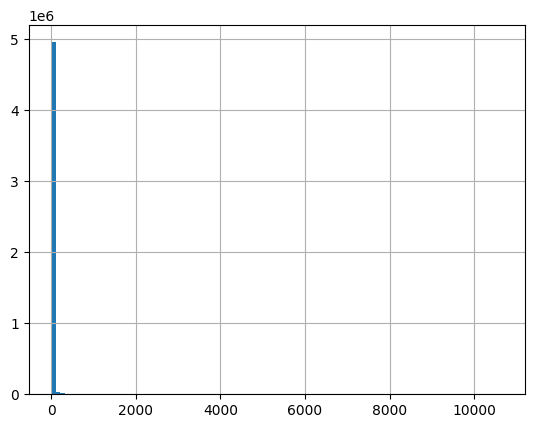

In [12]:
df_group['value'].hist(bins = 100)
plt.show()

[]

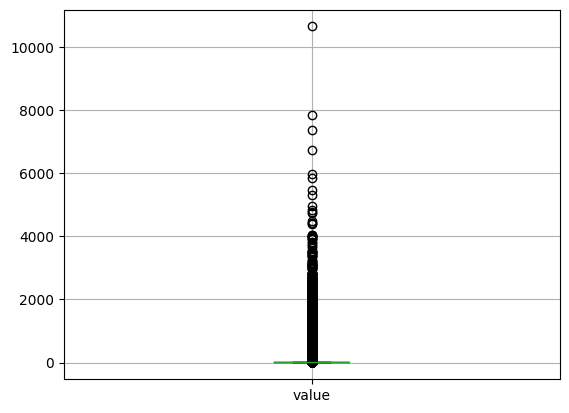

In [13]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [14]:
df_group['value'].sort_index().value_counts()

value
1       4316553
2        129961
3         74389
4         50912
5         37982
         ...   
1534          1
1806          1
1871          1
2027          1
3011          1
Name: count, Length: 1714, dtype: int64

In [15]:
df_group.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_groupby_final.csv'))

In [16]:
df_group.head()

,end_station_name,end_lat,end_lng,start_station_name,start_lat,start_lng,value
0,1 Ave & E 110 St,40.792327,-73.9383,1 Ave & E 110 St,40.792327,-73.938300,7
1,1 Ave & E 110 St,40.792327,-73.9383,1 Ave & E 39 St,40.747140,-73.971130,1
2,1 Ave & E 110 St,40.792327,-73.9383,1 Ave & E 68 St,40.765005,-73.958185,3
3,1 Ave & E 110 St,40.792327,-73.9383,1 Ave & E 78 St,40.771404,-73.953517,1
4,1 Ave & E 110 St,40.792327,-73.9383,2 Ave & E 104 St,40.789211,-73.943708,1


In [17]:
# Take a 30% sample of the dataframe to create the KeplerGl plot

df_sample = df_group.sample(frac=0.3, random_state=1)
print(df_sample)

                            end_station_name    end_lat    end_lng  \
1116657                  Broadway & W 133 St  40.819034 -73.956156   
837673              Amsterdam Ave & W 172 St  40.842173 -73.935111   
3502873             Pacific St & Classon Ave  40.679194 -73.958790   
3210868                 Madison Av & E 51 St  40.758630 -73.975130   
772862   Adam Clayton Powell Blvd & W 138 St  40.816960 -73.942296   
...                                      ...        ...        ...   
1754750                      E 11 St & 1 Ave  40.729538 -73.984267   
2071624                       E 4 St & 2 Ave  40.726281 -73.989780   
4971042             Wilson Ave & Troutman St  40.701660 -73.927540   
1025009                  Bond St & Bergen St  40.684967 -73.986208   
4398802                      W 35 St & 9 Ave  40.754145 -73.996089   

                          start_station_name  start_lat  start_lng  value  
1116657             E 103 St & Lexington Ave  40.790208 -73.947517      1  
837673 

In [19]:
# Create KeplerGl instance

m = KeplerGl(height = 900, data={"data_1": df_sample})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':                             end_station_name    end_lat    end_lng  \
1116657        …

I did not change any colors yet

In [33]:
# Save a configuration file

config = m.config

In [ ]:
# Save the KeplerGl map to a HTML file

m.save_to_html(file_name='NYC Bike Trips Aggregated.html', read_only = False, config = config)